In [26]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt 

In [27]:
data = pd.read_csv("Mall_Customers.csv")
data.columns = ['Customer_ID','Gender','Age','Income','Spendings']
data.head()

,Customer_ID,Gender,Age,Income,Spendings
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
pp.ProfileReport(data)

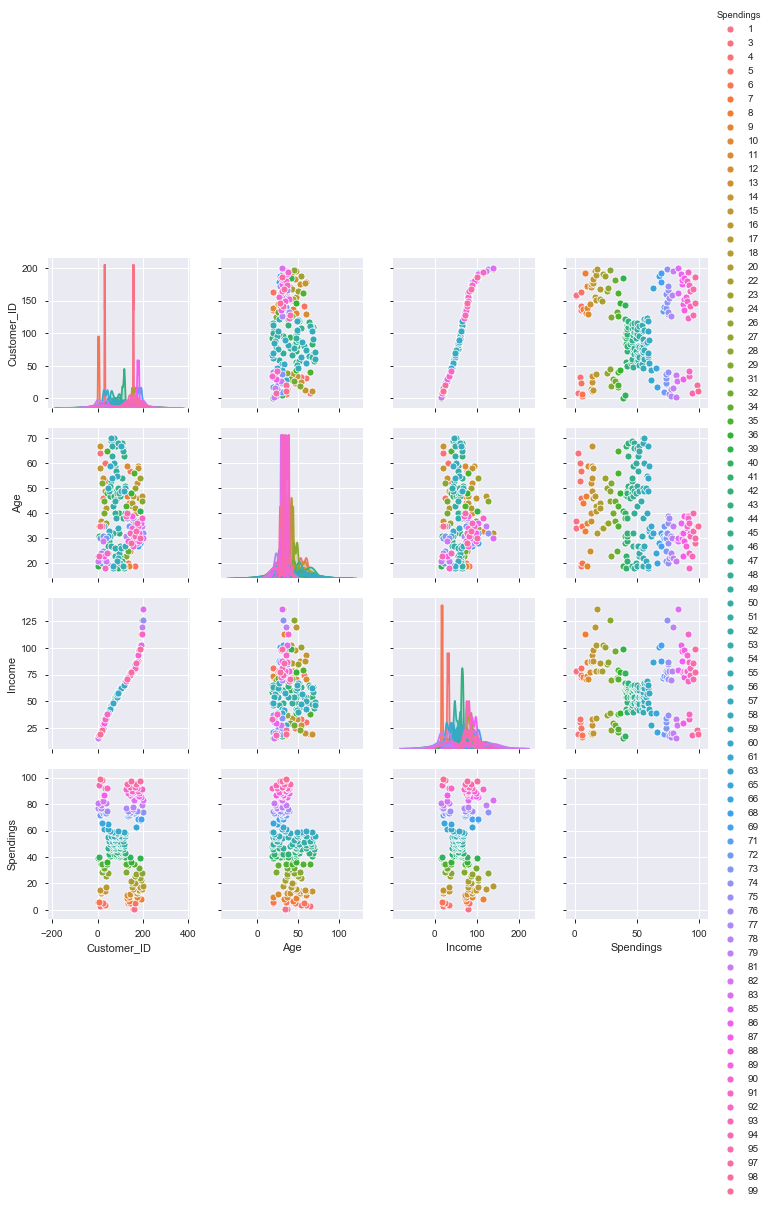

In [34]:
sns.pairplot(data, hue ='Spendings')

In [37]:
data['Gender'].replace(('Male','Female'),('0','1'), inplace  = True)

In [42]:
data[['Gender','Customer_ID']].groupby('Gender').count()

,Customer_ID
Gender,
0,88
1,112


In [55]:
gender_spendings = data[['Spendings','Gender']].groupby('Gender').mean()
gender_spendings 

,Spendings
Gender,
0,48.511364
1,51.526786


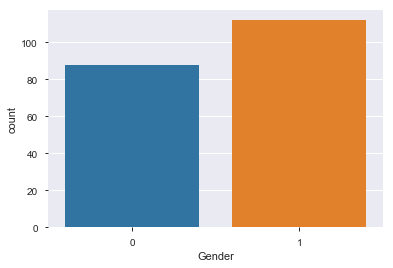

In [48]:
sns.countplot(data.Gender)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

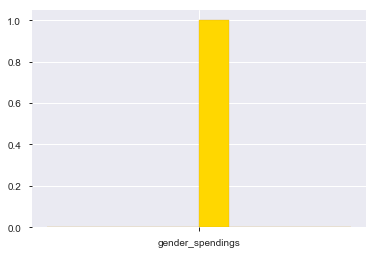

In [53]:
plt.hist(['gender_spendings'], color = 'gold', edgecolor = 'goldenrod')

In [56]:
X = data[['Income' , 'Spendings']].iloc[: , :].values

In [59]:
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:

km.cluster_centers_

array([[86.53846154, 82.12820513],
       [44.15447154, 49.82926829],
       [87.        , 18.63157895]])

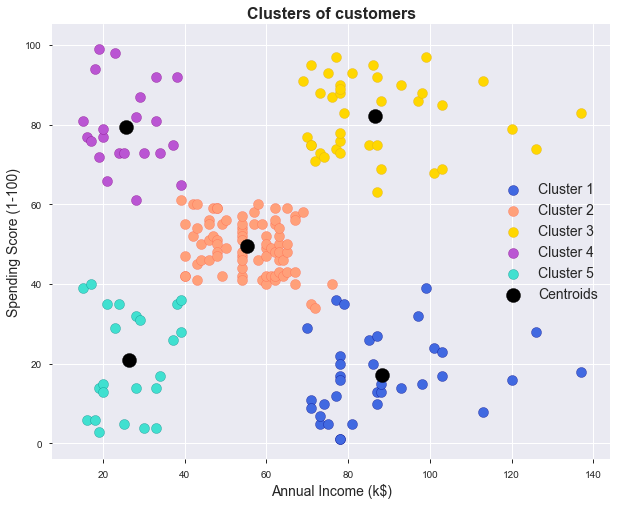

In [75]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'royalblue', edgecolors = 'navy', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightsalmon', edgecolors = 'tomato', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gold', edgecolors = 'goldenrod', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'mediumorchid', edgecolors = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'turquoise', edgecolors = 'teal', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers', fontsize = 16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize = 14)
plt.ylabel('Spending Score (1-100)', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('Clusters of customers.png', bbox_inches = 'tight')
plt.show()